In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pwd

'/Users/iyobosaibude/Downloads'

In [4]:
df = pd.read_csv('customer_booking.csv',  encoding='latin-1')

In [5]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
low_card_cat = ['sales_channel', 'trip_type', 'flight_day'] 

In [8]:
low_card_df = df[low_card_cat]

In [9]:
# Encoding categorical data with low cardinality

one_hot_encoded_data = pd.get_dummies(low_card_df, drop_first= True)
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_data)

df1 = pd.concat([df, one_hot_encoded_df], axis=1)
df1.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,...,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,...,0,0,0,1,0,1,0,0,0,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,...,0,0,0,1,0,1,0,0,0,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,...,0,0,0,1,0,0,0,0,0,1
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,...,0,0,0,1,0,1,0,0,0,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,...,0,0,0,1,0,0,0,0,0,1


In [10]:
# Encoding categorical data with high cardinality

high_card_cat = ['route', 'booking_origin']

# Encoding using frequency encoding
for cat in high_card_cat:  
    df_frequency_map = df1[cat].value_counts().to_dict()
    df1[cat] = df1[cat].map(df_frequency_map)

In [11]:
df1.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'sales_channel_Mobile', 'trip_type_OneWay', 'trip_type_RoundTrip',
       'flight_day_Mon', 'flight_day_Sat', 'flight_day_Sun', 'flight_day_Thu',
       'flight_day_Tue', 'flight_day_Wed'],
      dtype='object')

In [12]:
df2 = df1.drop(columns=low_card_cat, axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   purchase_lead          50000 non-null  int64  
 2   length_of_stay         50000 non-null  int64  
 3   flight_hour            50000 non-null  int64  
 4   route                  50000 non-null  int64  
 5   booking_origin         50000 non-null  int64  
 6   wants_extra_baggage    50000 non-null  int64  
 7   wants_preferred_seat   50000 non-null  int64  
 8   wants_in_flight_meals  50000 non-null  int64  
 9   flight_duration        50000 non-null  float64
 10  booking_complete       50000 non-null  int64  
 11  sales_channel_Mobile   50000 non-null  uint8  
 12  trip_type_OneWay       50000 non-null  uint8  
 13  trip_type_RoundTrip    50000 non-null  uint8  
 14  flight_day_Mon         50000 non-null  uint8  
 15  fl

In [13]:
# normalization
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df2)

scaled_df = pd.DataFrame(scaled_data, columns=df2.columns)
scaled_df.sample(10)


,num_passengers,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
13071,0.000,0.041522,0.030848,0.173913,0.057484,1.000000,1.0,0.0,1.0,0.861284,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
12254,0.000,0.058824,0.042416,0.608696,0.026876,0.189469,1.0,0.0,1.0,0.136646,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8188,0.125,0.021915,0.037275,0.391304,0.099664,0.071009,1.0,1.0,1.0,0.861284,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
40835,0.000,0.033449,0.006427,0.478261,0.313923,1.000000,0.0,0.0,1.0,0.861284,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
23888,0.000,0.066897,0.114396,0.434783,0.116088,0.003245,1.0,0.0,0.0,0.196687,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
30663,0.375,0.339100,0.005141,0.608696,0.277342,0.113536,1.0,0.0,0.0,0.482402,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9746,0.000,0.051903,0.035990,0.652174,0.253080,1.000000,0.0,0.0,0.0,0.196687,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
43242,1.000,0.083045,0.007712,0.347826,0.154162,0.255050,1.0,0.0,1.0,0.403727,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
44359,0.125,0.116494,0.007712,0.478261,0.008212,0.071009,1.0,0.0,0.0,0.175983,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10465,0.000,0.063437,0.021851,0.260870,0.116461,0.217335,1.0,0.0,0.0,0.600414,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
scaled_df.shape

(50000, 20)

In [15]:
X = scaled_df.drop('booking_complete', axis=1)
y = df['booking_complete']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=0)
X_sm, y_sm = smote.fit_resample(X,y)

In [17]:
y_sm.value_counts()

0    42522
1    42522
Name: booking_complete, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, stratify=y_sm, test_size=0.2, random_state=0)

In [19]:
y_train.value_counts()

1    34018
0    34017
Name: booking_complete, dtype: int64

In [21]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf=RandomForestClassifier()

In [22]:

model = clf
scores = cross_val_score(model, X_sm, y_sm, cv=10, scoring='accuracy')

print('Accuracy: %0.2f' %(scores.mean()))

Accuracy: 0.76


In [23]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
print(score)

0.9145158445528838


In [24]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      8505
           1       0.95      0.88      0.91      8504

    accuracy                           0.91     17009
   macro avg       0.92      0.91      0.91     17009
weighted avg       0.92      0.91      0.91     17009



In [35]:
feature_importance = zip(X_sm.columns, clf.feature_importances_)
ft_importance = list(feature_importance) 

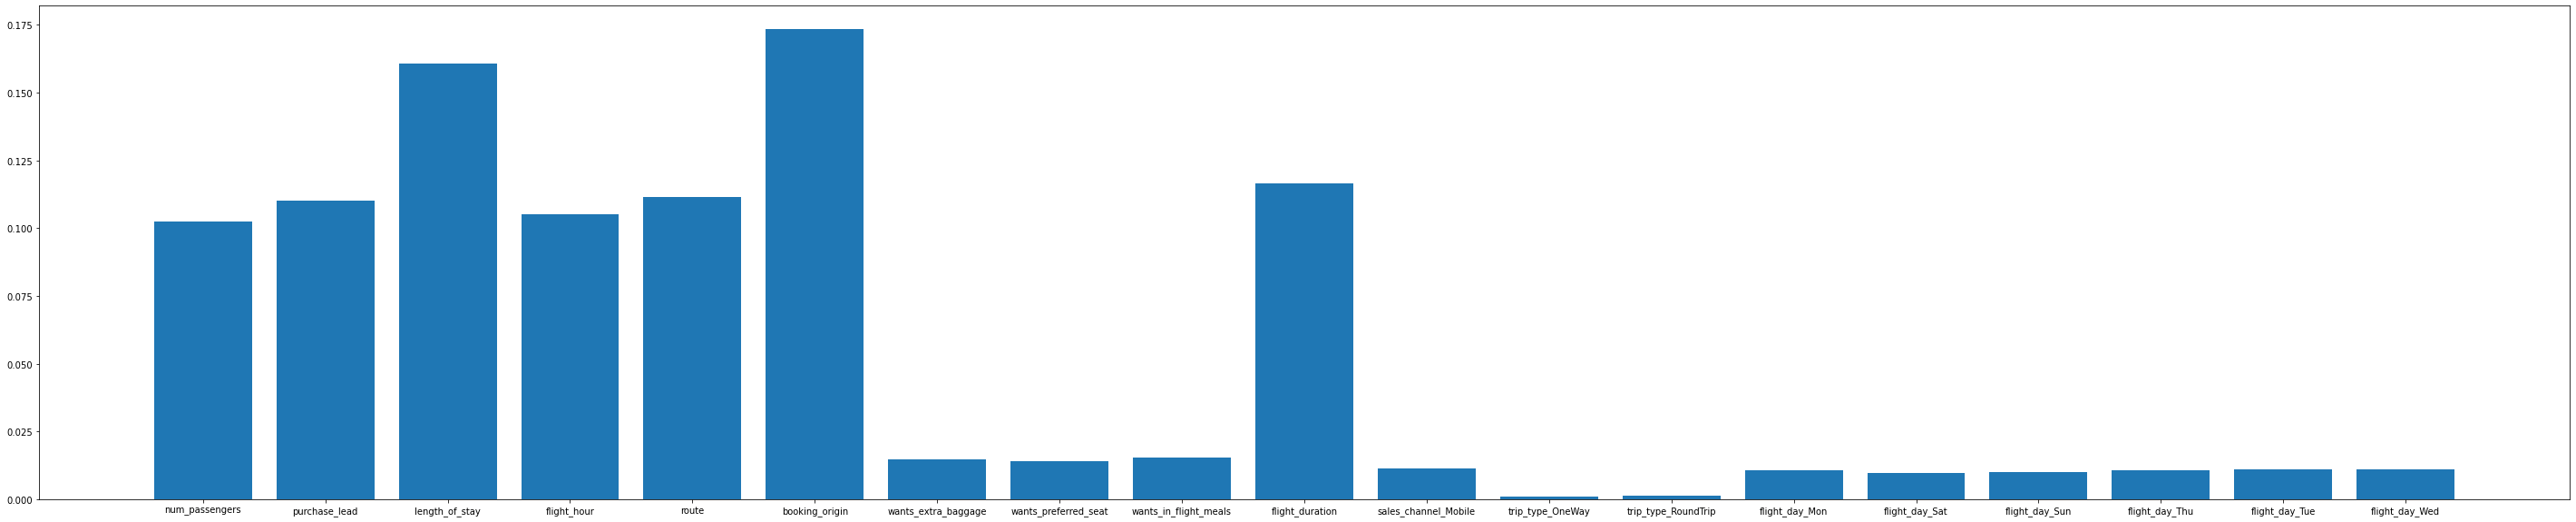

In [50]:
feature = []
score = []
for i,v in ft_importance :
    feature.append(i)
    score.append(v)
# plot feature importance
plt.figure(figsize=(50, 10))
plt.bar(feature, score)
plt.show()
